In [4]:
from bs4 import BeautifulSoup
import numpy as np

import unicodedata
import requests
import re

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.DataFrame(columns={'title', 'date', 'link', 'author', 'journal'})

In [39]:
df = pd.read_csv('df_encode_1.csv', index_col=0)

In [40]:
for j in range(290,600):
    if (j % 30) == 0:
        print j
    pg = "http://www.dagospia.com/home/"+str(j)+".htm"
    page = requests.get(pg).content
    soup = BeautifulSoup(page)

    soup = soup.select('section')[0]
    articles = soup.findAll("article", class_="articolo")
    
    articles = [article for article in articles if 'video' not in article['class']]
    
    for article in articles:
        if len(article.findAll('p')) > 0:
            title = article.findAll('p')[0]
        else:
            title = article.findAll('a')[0]
        date = article.findAll("time")[0]['content']
        link = article.findAll('a')[0]['href']
        
        pg = "http://www.dagospia.com/"+link
        page = requests.get(pg).content
        subsoup = BeautifulSoup(page)
        
        auths = [s for s in subsoup.findAll('strong') if len(s.getText().split(' per ')) == 2]
        if len(auths)>0:
            author, journal = auths[0].getText().split(' per ')
        else:
            author = None
            journal = None
        
        title = unicodedata.normalize('NFKD', title.text.lower()).encode('ascii','ignore')
        title = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in title.split("\n")]
        
        if author is not None:
            author = unicodedata.normalize('NFKD', author.lower()).encode('ascii','ignore')
            author = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in author.split("\n")]
            author = author[0]
            
        if journal is not None:
            journal = unicodedata.normalize('NFKD', journal.lower()).encode('ascii','ignore')
            journal = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in journal.split("\n")]
            journal = journal[0]
            
        dftmp = pd.DataFrame(data={'title':[title[0]]
                                      , 'date':[date]
                                      , 'link':[link]
                                      , 'author':[author]
                                      , 'journal':[journal]})
        df = df.append(dftmp)

300
330
360
390
420
450
480
510
540
570


In [41]:
df.to_csv('df_encode_2.csv')

In [5]:
df = pd.read_csv('df_encode_2.csv', index_col=0)

In [6]:
len(df)

31768

In [7]:
df = df.drop_duplicates()

In [8]:
len(df)

30105

In [9]:
import datetime

df['date'] = pd.to_datetime(df['date'])

df['weekday'] = df['date'].apply(datetime.datetime.weekday)
df['day'] = df['date'].apply(datetime.datetime.date)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['month'] = df['date'].apply(lambda x: x.month)
df['week'] = df['date'].apply(lambda x: x.week)
df['year'] = df['date'].apply(lambda x: x.year)

df = df[df['year'] == 2018]

In [10]:
def fixed_journal(journal):
    if journal in ['il corriere della sera', 'www corriere it', 'il corriere della sera ', 
                   'liberi tutti corriere della sera', 'corriere it', 
                   'il corriere della sera', 'www corriere it ',' www corriere it ', ' www corriere it']:
        return 'il corriere della sera'
    
    elif journal in ['il giornale', 'www ilgiornale it', 'il giornale ', ' il giornale', ' il giornale ']:
        return 'il giornale'
    
    elif journal in ['gazzetta it', 'la gazzetta dello sport', ' gazzetta it','gazzetta it ',' gazzetta it ']:
        return 'la gazzetta dello sport'
    
    elif journal in ['www ilsole24ore com', 'www ilsole24ore com ', 'il sole 24 ore', 
                     'il sole 24 ore ',  ' il sole 24 ore', ' il sole 24 ore ',]:
        return 'il sole 24 ore'
    
    elif journal in [' il fatto quotidiano',' il fatto quotidiano ',]:
        return  'il fatto quotidiano'
    
    elif journal in ['libero quotidiano', 'libero quotidiano ', ' libero quotidiano ',]:
        return 'libero quotidiano'
    
    elif journal in ['il messaggero', 'il messaggero ', 'www ilmessaggero it', ' il messaggero ']:
        return 'il messaggero'
    
    elif journal in ['www lastampa it', 'la stampa', 'la stampa ', ' la stampa ']:
        return 'la stampa'
    
    elif journal in ['repubblica it', 'la repubblica', 'la repubblica ', ' la repubblica ',
                     'www repubblica it', ' www repubblica it ', ' www repubblica it', 'il venerdi la repubblica']:
        return 'la repubblica'
    
    elif journal in [' dagospia ', 'dagospia' , 'dagopsia', 'dagospia', 'dagospia ', 'dagospia pubblicato ieri ',]:
        return 'dagospia'
    
    else:
        return journal

In [11]:
df['journal_fixed'] = df['journal'].apply(fixed_journal)

In [12]:
len(df)

26682

In [13]:
len(df)/365.

73.1013698630137

In [16]:
sns.set(style="white", context="talk")

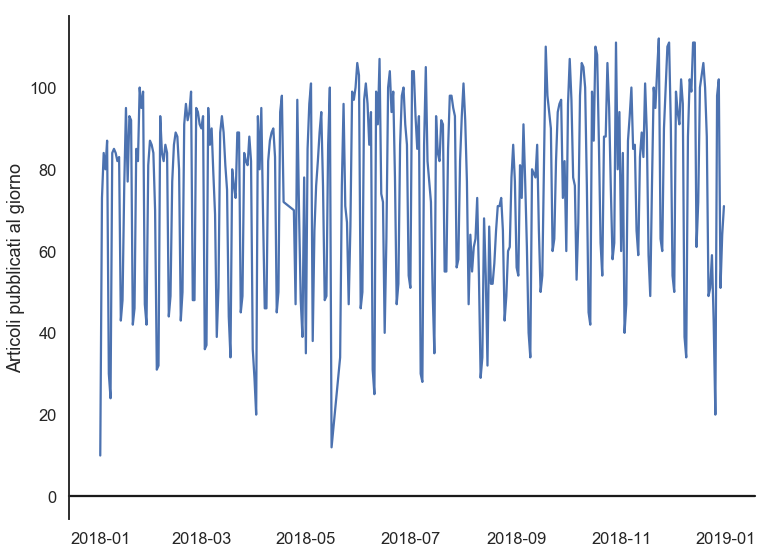

In [39]:
sns.set(style="white", context="talk")

# Randomly reorder the data to make it qualitative
hours = df[df['year'] == 2018][['date','day']].groupby('day').count()

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.lineplot(x=hours.index.values, y=hours.date.values, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articoli pubblicati al giorno")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/timeseries.png', dpi=300)

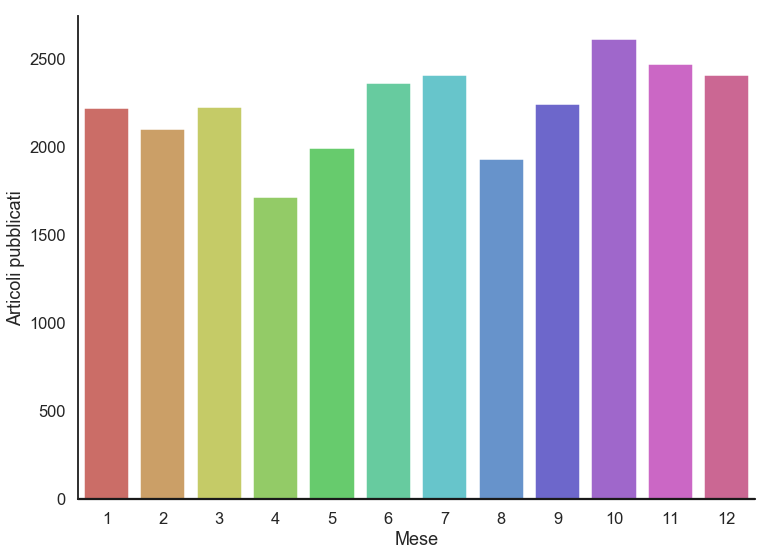

In [40]:
sns.set(style="white", context="talk")

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.countplot(x='month', data=df, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articoli pubblicati")
axes.set_xlabel("Mese")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_per_month.png', dpi=300)

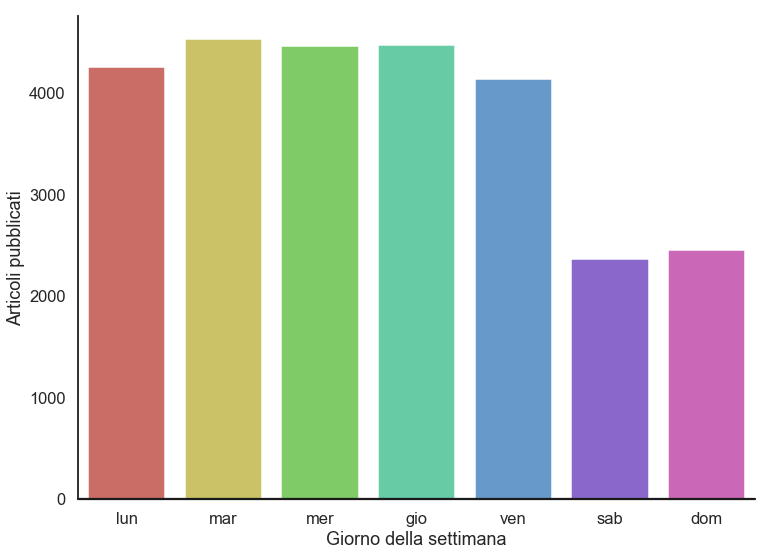

In [41]:
sns.set(style="white", context="talk")

# Randomly reorder the data to make it qualitative
hours = df[['date','weekday']].groupby('weekday').count()

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.barplot(x=['lun','mar','mer','gio','ven','sab','dom'], y=hours.date.values, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articoli pubblicati")
axes.set_xlabel("Giorno della settimana")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_per_day.png', dpi=300)

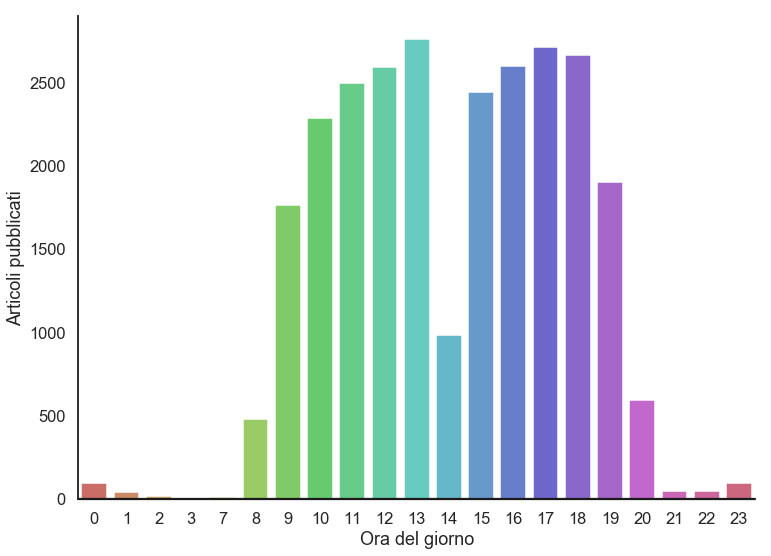

In [42]:
sns.set(style="white", context="talk")

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.countplot(x='hour', data=df, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articoli pubblicati")
axes.set_xlabel("Ora del giorno")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_per_hour.png', dpi=300)

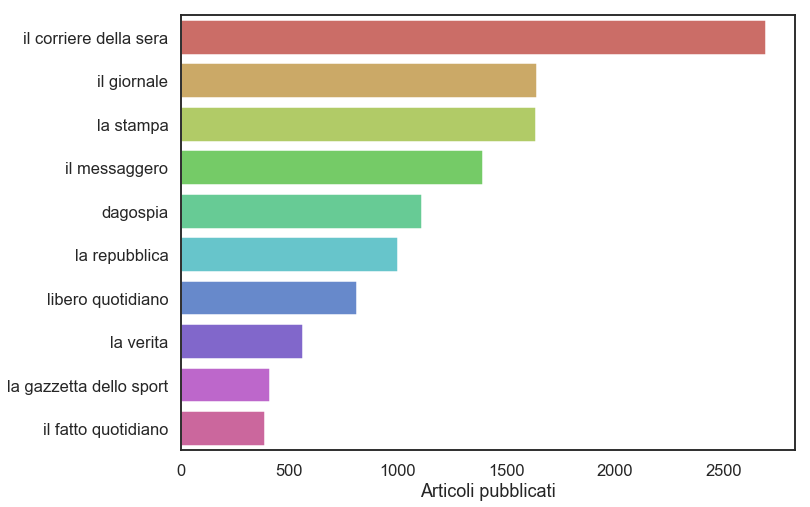

In [46]:
fig, axes = plt.subplots(1,1, figsize=(11,8))

auths = df[['date','journal_fixed']].groupby('journal_fixed').count().sort_values('date', ascending=False)[:10]
sns.barplot(y=auths.index.values, x=auths.date.values, orient='h', palette="hls",)
axes.set_xlabel("Articoli pubblicati")

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_top_journ.png', dpi=300, bbox_inches='tight')

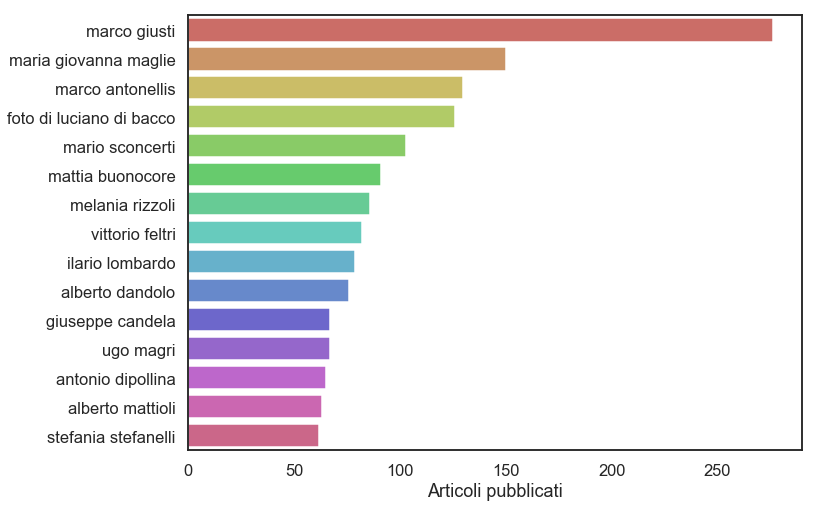

In [47]:
fig, axes = plt.subplots(1,1, figsize=(11,8))

auths = df[['date','author']].groupby('author').count().sort_values('date', ascending=False)[:15]
sns.barplot(y=auths.index.values, x=auths.date.values, orient='h', palette="hls",)
axes.set_xlabel("Articoli pubblicati")

plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_top_auths.png', dpi=300, bbox_inches='tight')

In [19]:
df[['date','author']].groupby('author').count().sort_values('date', ascending=False)[:10]

,date
author,
marco giusti,276
maria giovanna maglie,150
marco antonellis,130
foto di luciano di bacco,126
mario sconcerti,103
mattia buonocore,91
melania rizzoli,86
vittorio feltri,82
ilario lombardo,79


In [20]:
df[['date','weekday']].groupby('weekday').count()

,date
weekday,
0,4259
1,4530
2,4464
3,4474
4,4137
5,2367
6,2451


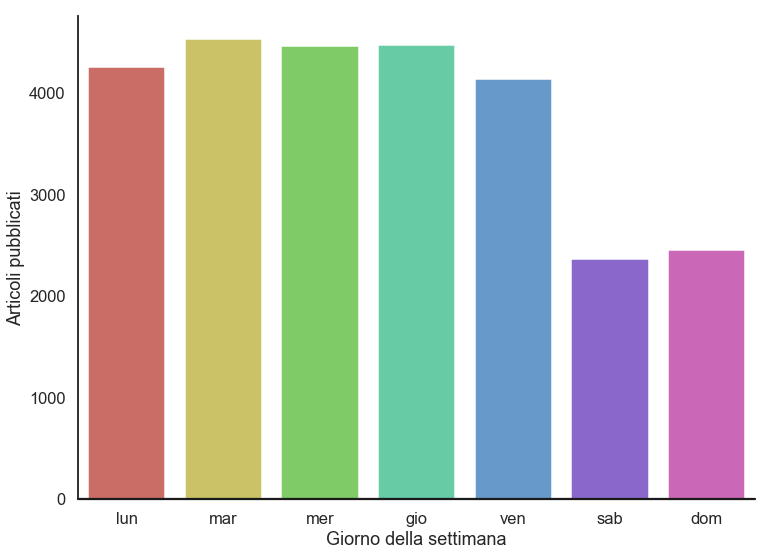

In [48]:
sns.set(style="white", context="talk")

# Randomly reorder the data to make it qualitative
hours = df[['date','weekday']].groupby('weekday').count()

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.barplot(x=['lun','mar','mer','gio','ven','sab','dom'], y=hours.date.values, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articoli pubblicati")
axes.set_xlabel("Giorno della settimana")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.savefig('/Users/am8e13/Dropbox/dagoanalisi/figures/art_daysweek.png', dpi=300, bbox_inches='tight')

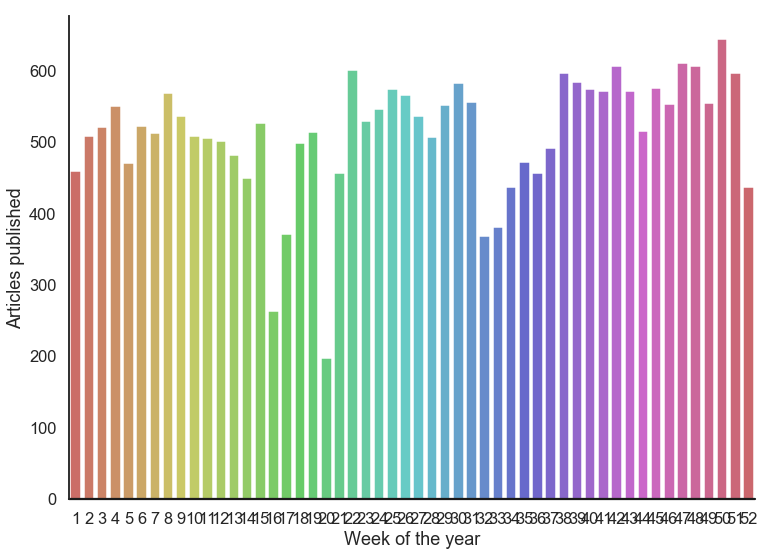

In [42]:
sns.set(style="white", context="talk")

# Randomly reorder the data to make it qualitative
hours = df[df['year'] == 2018][['date','week']].groupby('week').count()

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.barplot(x=hours.index.values, y=hours.date.values, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articles published")
axes.set_xlabel("Week of the year")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

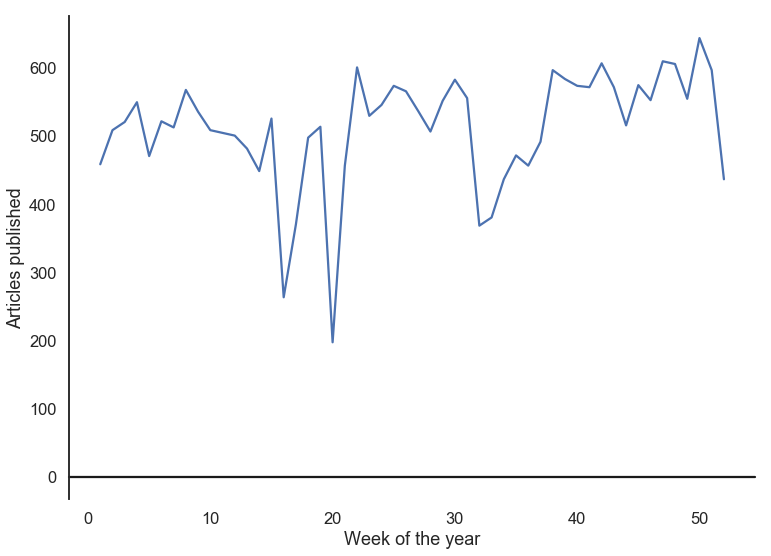

In [43]:
sns.set(style="white", context="talk")

# Randomly reorder the data to make it qualitative
hours = df[df['year'] == 2018][['date','week']].groupby('week').count()

fig, axes = plt.subplots(1,1, figsize=(11,8))
sns.lineplot(x=hours.index.values, y=hours.date.values, palette="hls", ax=axes)
axes.axhline(0, color="k", clip_on=False)
axes.set_ylabel("Articles published")
axes.set_xlabel("Week of the year")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [ ]:
# https://github.com/AndreaCirilloAC/TweetIT

In [5]:
import pickle
pickle.dump(df, open( "df.p", "wb" ) )

In [11]:
import pickle
pickle.dump(titles, open( "titles.p", "wb" ) )

In [12]:
titles_clean = [re.sub(r"[^a-zA-Z0-9]+", ' ', k)  for t in titles for k in t.split("\n")]

while '' in titles_clean:
    titles_clean.remove('')

In [13]:
print len(titles_clean)

27582


In [14]:
print len(list(set(titles_clean)))

26867


In [15]:
titles_clean = list(set(titles_clean))

In [28]:
import pickle
pickle.dump(titles_clean, open( "titles_clean.p", "wb" ) )

In [17]:
df = pd.read_csv('negative.txt', header=None, names=['text'])
negatives = df['text'].values

df = pd.read_csv('positive.txt', header=None, names=['text'])
positives= df['text'].values

In [18]:
df = pd.read_csv('neg.words.txt.gz', header=None, names=['text'])
negatives1 = df['text'].values

df = pd.read_csv('pos.words.txt.gz', header=None, names=['text'])
positives1 = df['text'].values

In [19]:
scores = []
for title in titles_clean:
    score = 0
    for p in positives:
        if title.lower().find(p) >= 0:
            score += 1
    for p in negatives:
        if title.lower().find(p) >= 0:
            score -= 1

    scores.append(score)

In [27]:
print titles_clean[np.argmin(scores)]
print '\n'
print titles_clean[np.argmax(scores)]

il male oscuro dei dj si chiama post performance depression e colpisce chi scende dal palcoscenico ed e costretto a tornare a una vita normale porta tristezza crisi di pianto ansia e attacchi di panico e al consumo esagerato di alcol e droghe e il musicista svedese avicii e solo l ultima vittima


il senatore semplice renzi scatenato da giannini a circo massimo questa classe politica di cialtroni non puo legiferare sui vaccini con le loro promesse vuote causeranno una crisi economica ma chi li schioda il governo e piu compatto di quanto sembri la fiducia su milleproroghe illegittima avverte salvini e in cima ai sondaggi io so bene come il consenso cambi velocemente 


In [26]:
print np.median(scores)
print np.mean(scores)
print np.std(scores)

-1.0
-1.71641791045
4.10853418544


(array([   51.,    83.,    98.,   158.,   236.,   321.,   505.,   701.,
          872.,  1233.,  1552.,  1999.,  2442.,  2901.,  2973.,  3048.,
         2449.,  1749.,  1215.,   800.,   551.,   313.,   235.,   118.,
           66.,    46.,    27.,    16.,    10.,     9.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14,  15]),
 <a list of 30 Patch objects>)

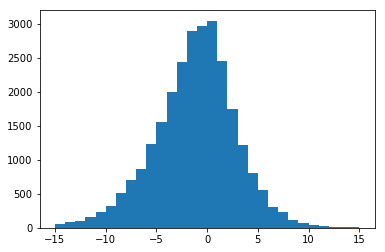

In [23]:
plt.hist(scores, bins=np.arange(-15,16,1))